In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DAY-28-DS-SHAPE-AI/bodyfat.csv')

In [3]:
print(len(df))

252


In [4]:
df.head(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
5  42.0   25.6    35.7     30.6   18.8  
6  38.3   22.9    31.9     27.8   17.7  
7  39.4   23.2    30.5     29.0   18.8  
8  38.3   23.8    35.9     31.1   18.2  
9  41.7   25.0    35.6     30.0   19.2

In [5]:
df.tail(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
242   1.0304     30.4   66  234.25   72.00  41.4  119.7    109.0  109.1   
243   1.0256     32.6   67  227.75   72.75  41.3  115.8    113.4  109.8   
244   1.0334     29.0   67  199.50   68.50  40.7  118.3    106.1  101.6   
245   1.0641     15.2   68  155.50   69.25  36.3   97.4     84.3   94.4   
246   1.0308     30.2   69  215.50   70.50  40.8  113.7    107.6  110.0   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
242   63.7  42.4   24.6    35.6     30.7   19.5  
243   65.6  46.0   25.4    35.3     29.8   19.5  
244   58.2  38.8   24.1    32.1     29.3   18.5  
245   54.3  37.5   22.6    29.2     27.3   18.5  
246   63.3  44.0   22.6    37.5     32.6   18.8  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9

In [6]:
df.describe().T

count        mean        std      min       25%       50%       75%  \
Density  252.0    1.055574   0.019031    0.995    1.0414    1.0549    1.0704   
BodyFat  252.0   19.150794   8.368740    0.000   12.4750   19.2000   25.3000   
Age      252.0   44.884921  12.602040   22.000   35.7500   43.0000   54.0000   
Weight   252.0  178.924405  29.389160  118.500  159.0000  176.5000  197.0000   
Height   252.0   70.148810   3.662856   29.500   68.2500   70.0000   72.2500   
Neck     252.0   37.992063   2.430913   31.100   36.4000   38.0000   39.4250   
Chest    252.0  100.824206   8.430476   79.300   94.3500   99.6500  105.3750   
Abdomen  252.0   92.555952  10.783077   69.400   84.5750   90.9500   99.3250   
Hip      252.0   99.904762   7.164058   85.000   95.5000   99.3000  103.5250   
Thigh    252.0   59.405952   5.249952   47.200   56.0000   59.0000   62.3500   
Knee     252.0   38.590476   2.411805   33.000   36.9750   38.5000   39.9250   
Ankle    252.0   23.102381   1.694893   19.100   22.0000   22.8000   24.0000   
Biceps   252.0   32.273413   3.021274   24.800   30.2000   32.0500   34.3250   
Forearm  252.0   28.663889   2.020691   21.000   27.3000   28.7000   30.0000   
Wrist    252.0   18.229762   0.933585   15.800   17.6000   18.3000   18.8000   

              max  
Density    1.1089  
BodyFat   47.5000  
Age       81.0000  
Weight   363.1500  
Height    77.7500  
Neck      51.2000  
Chest    136.2000  
Abdomen  148.1000  
Hip      147.7000  
Thigh     87.3000  
Knee      49.1000  
Ankle     33.9000  
Biceps    45.0000  
Forearm   34.9000  
Wrist     21.4000

In [7]:
df.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [8]:
df.isnull().any().any()

False

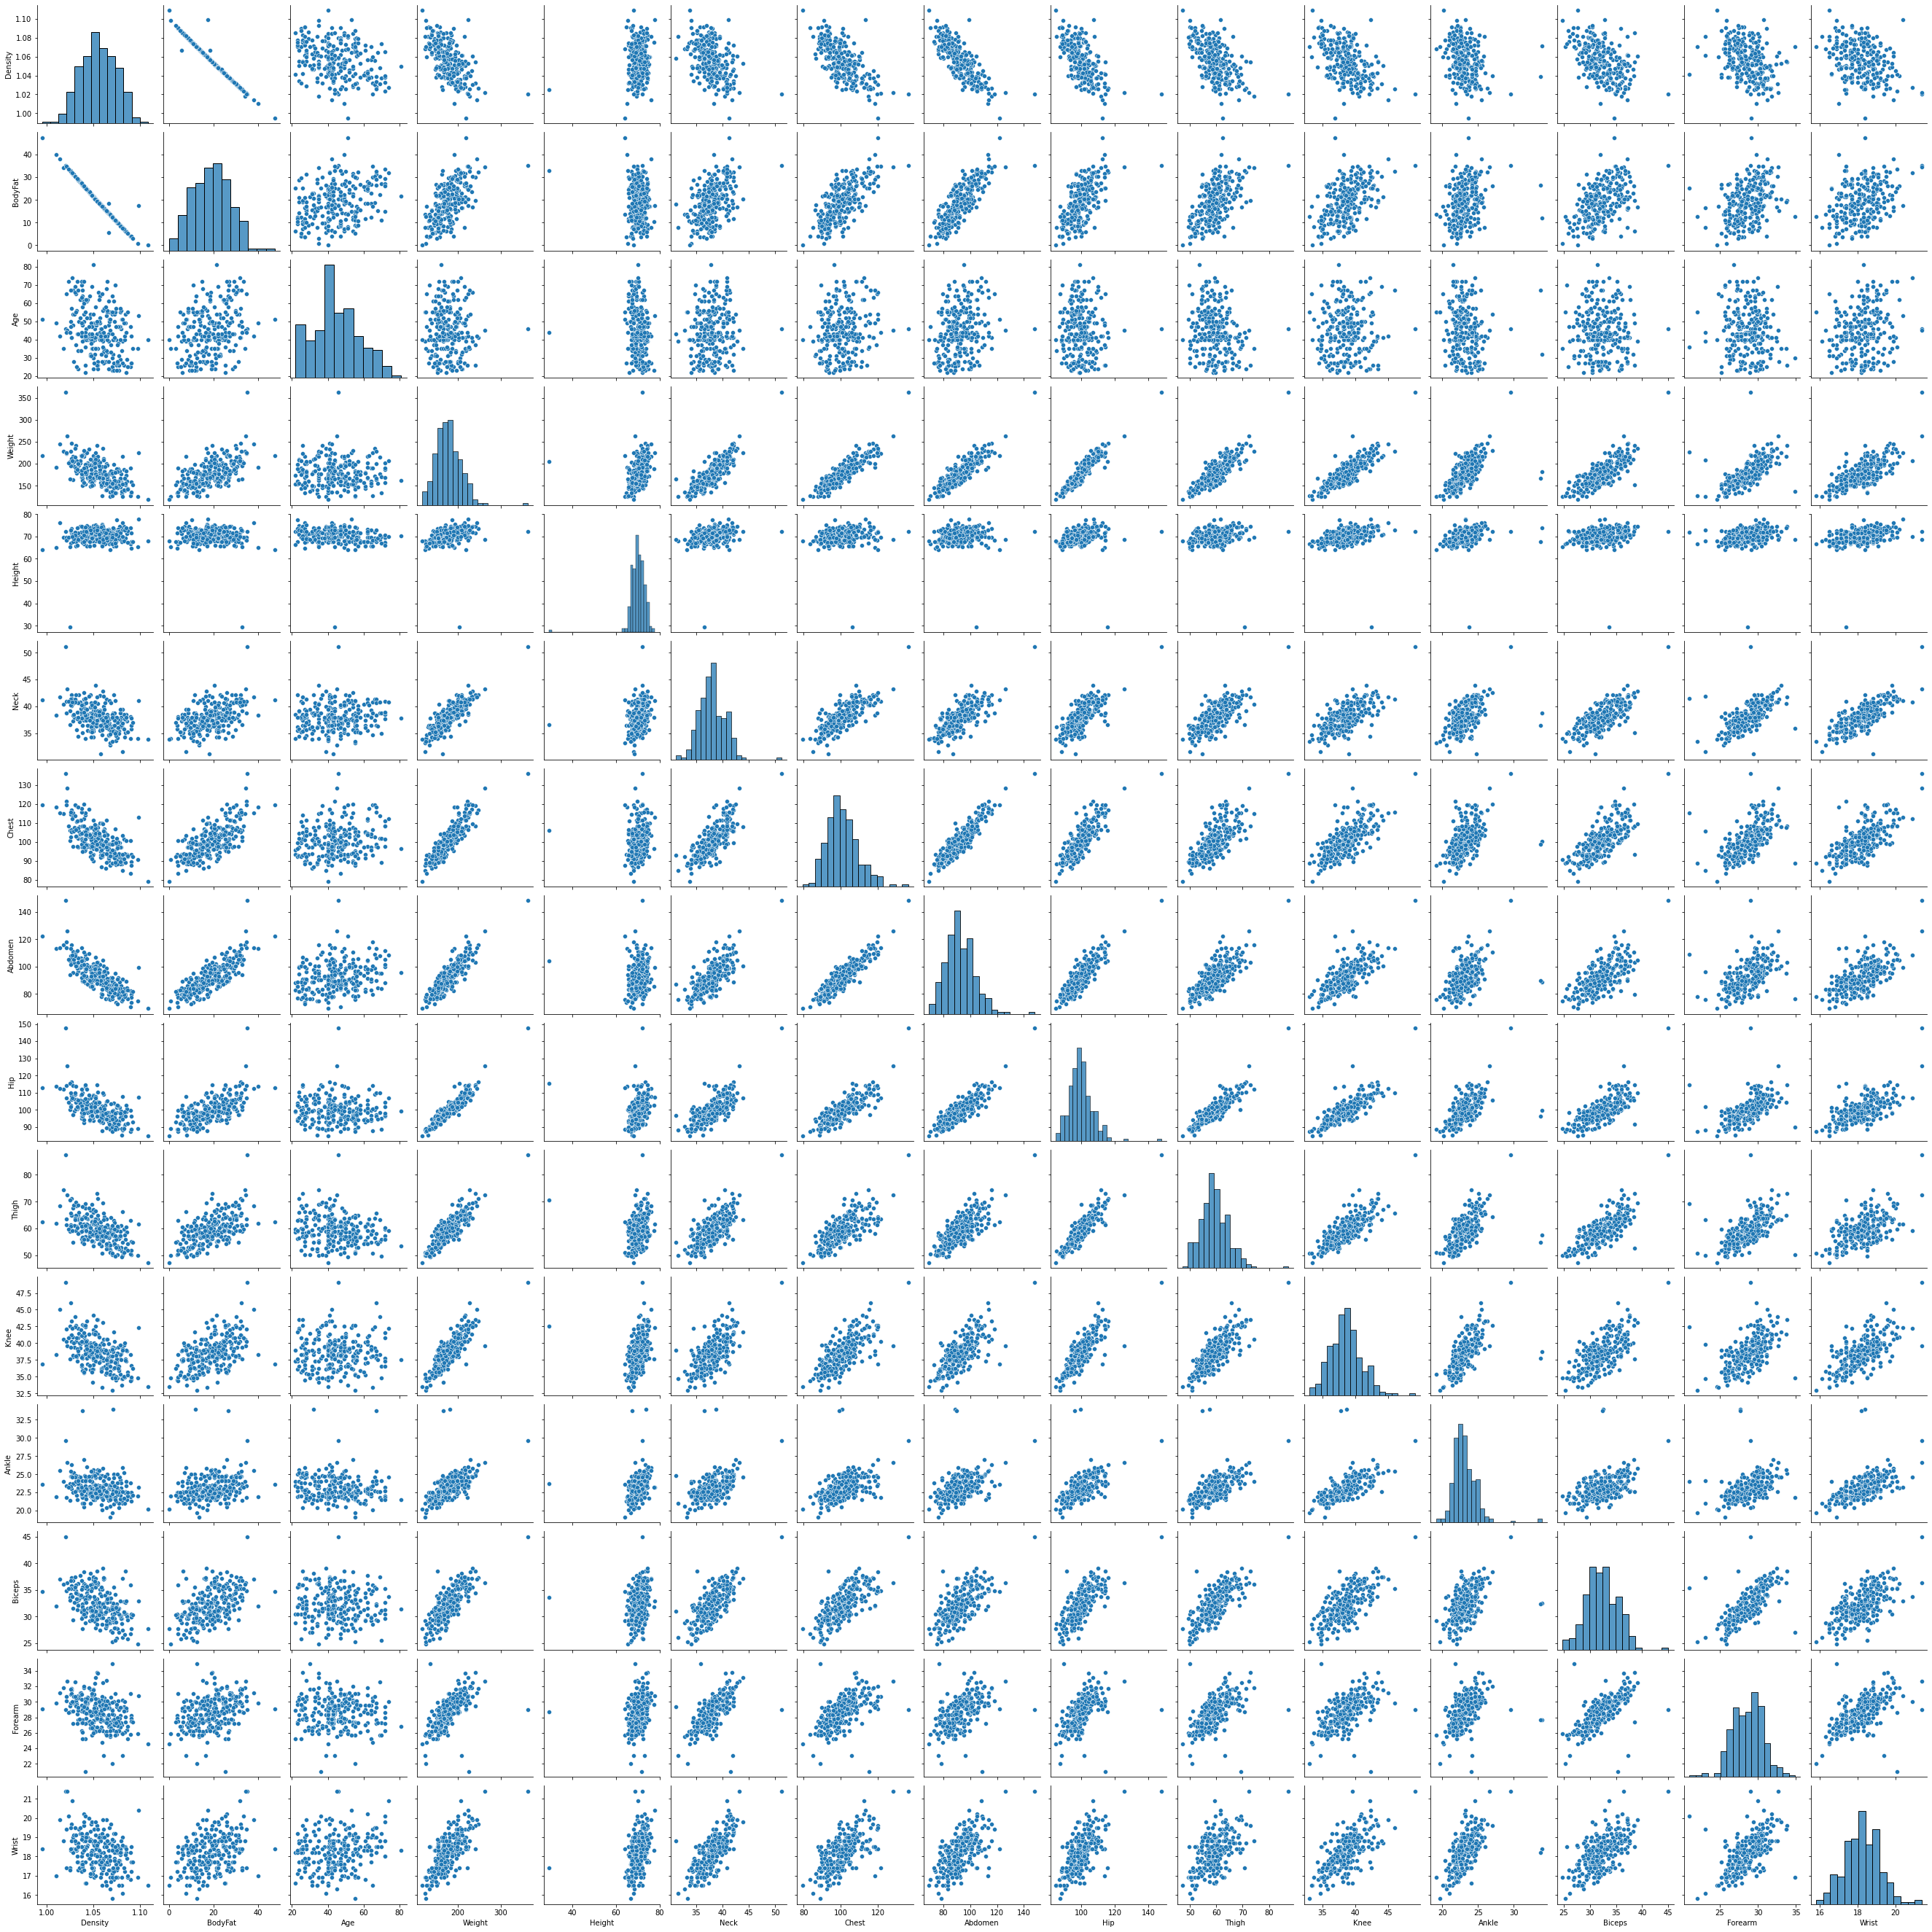

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988   
Biceps  -0.487109  0.493271 -0.041162  0.800416  0.207816  0.731146  0.727907   
Forearm -0.351648  0.361387 -0.085056  0.630301  0.228649  0.623660  0.580173   
Wrist   -0.325716  0.346575  0.213531  0.729775  0.322065  0.744826  0.660162   

          Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
Density -0.798955 -0.609331 -0.553091 -0.495040 -0.264890 -0.487109 -0.351648   
BodyFat  0.813432  0.625201  0.559608  0.508665  0.265970  0.493271  0.361387   
Age      0.230409 -0.050332 -0.200096  0.017516 -0.105058 -0.041162 -0.085056   
Weight   0.887995  0.940884  0.868694  0.853167  0.613685  0.800416  0.630301   
Height   0.087813  0.170394  0.148436  0.286053  0.264744  0.207816  0.228649   
Neck     0.754077  0.734958  0.695697  0.672405  0.477892  0.731146  0.623660   
Chest    0.915828  0.829420  0.729859  0.719496  0.482988  0.727907  0.580173   
Abdomen  1.000000  0.874066  0.766624  0.737179  0.453223  0.684983  0.503316   
Hip      0.874066  1.000000  0.896410  0.823473  0.558387  0.739273  0.545014   
Thigh    0.766624  0.896410  1.000000  0.799170  0.539797  0.761477  0.566842   
Knee     0.737179  0.823473  0.799170  1.000000  0.611608  0.678709  0.555898   
Ankle    0.453223  0.558387  0.539797  0.611608  1.000000  0.484855  0.419050   
Biceps   0.684983  0.739273  0.761477  0.678709  0.484855  1.000000  0.678255   
Forearm  0.503316  0.545014  0.566842  0.555898  0.419050  0.678255  1.000000   
Wrist    0.619832  0.630090  0.558685  0.664507  0.566195  0.632126  0.585588   

            Wrist  
Density -0.325716  
BodyFat  0.346575  
Age      0.213531  
Weight   0.729775  
Height   0.322065  
Neck     0.744826  
Chest    0.660162  
Abdomen  0.619832  
Hip      0.630090  
Thigh    0.558685  
Knee     0.664507  
Ankle    0.566195  
Biceps   0.632126  
Forearm  0.585588  
Wrist    1.000000

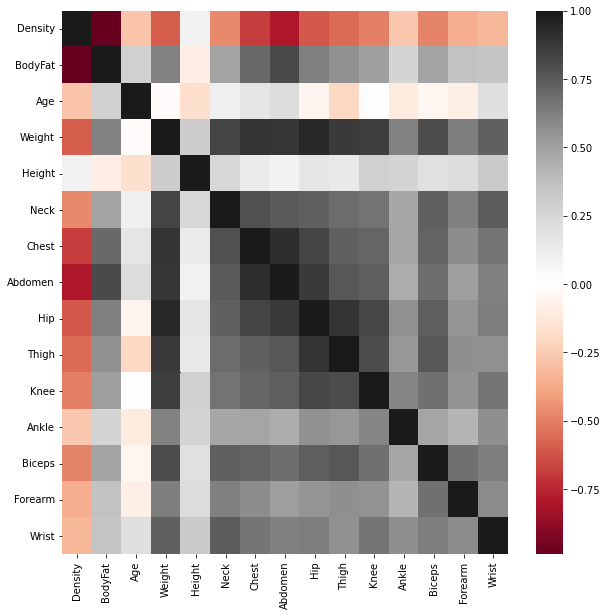

In [11]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdGy')

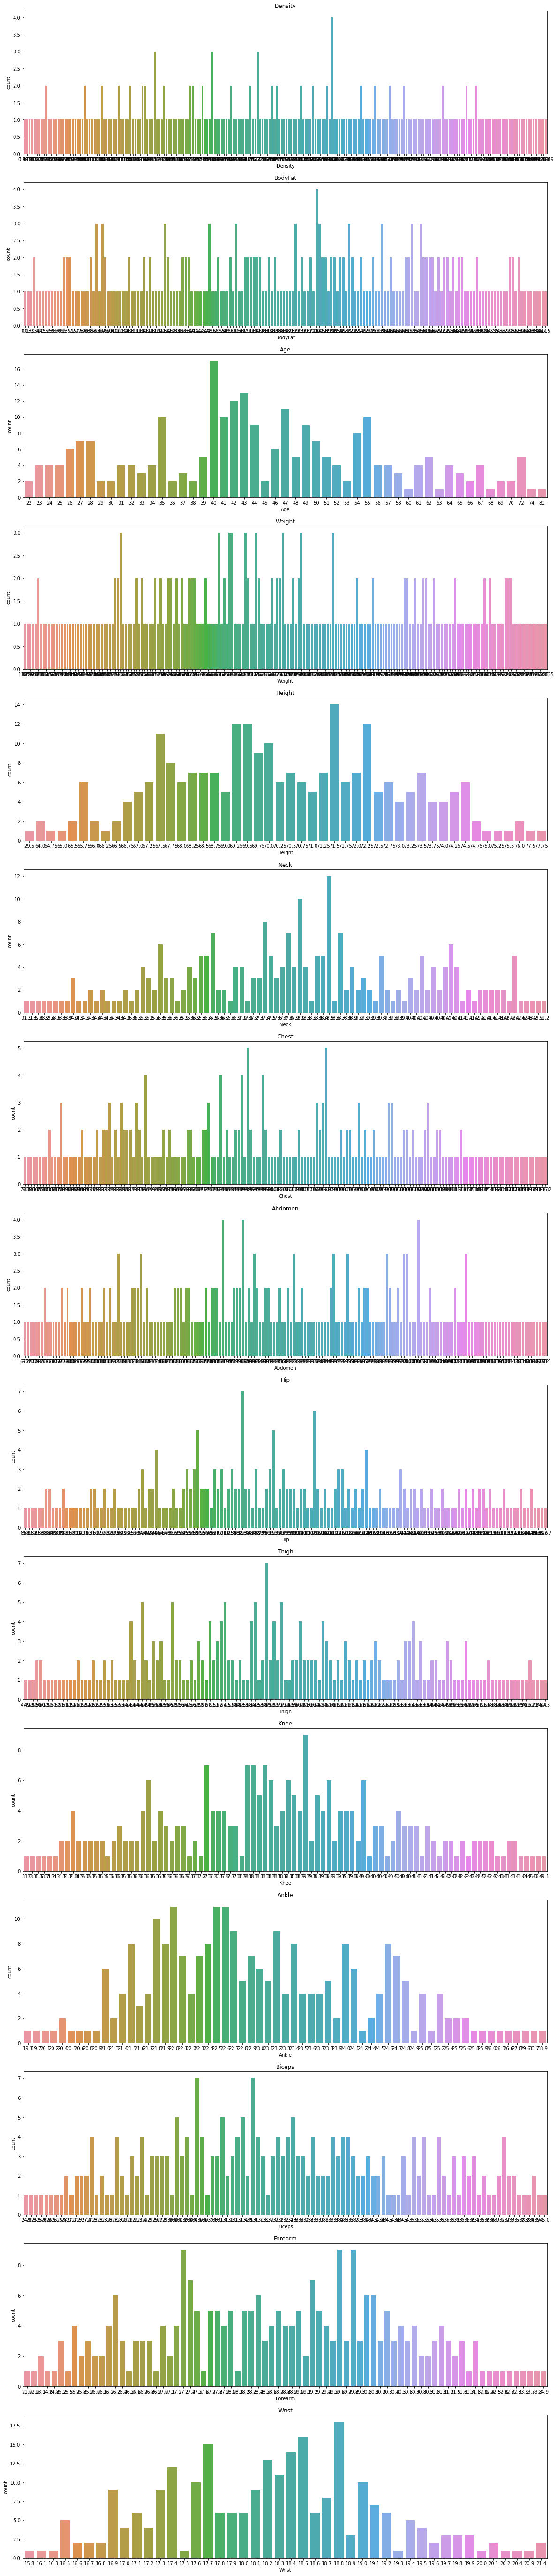

In [12]:
fig, ax =plt.subplots(15,1,figsize=(20,100))
x=0
for i in range(0,15):
    sns.countplot(x=df.columns[x],data=df,ax=ax[i]);
    ax[i].set_title(df.columns[x])
    fig.show()
    x+=1

In [13]:
y=np.array(df['BodyFat'])

In [14]:
print(y[:10])
print(y.shape)

[12.3  6.1 25.3 10.4 28.7 20.9 19.2 12.4  4.1 11.7]
(252,)


In [15]:
x=np.array(df[['Density','Weight','Chest','Abdomen','Hip','Thigh','Knee','Biceps','Neck']])

In [16]:
print(x[0:5])
print(x.shape)

[[  1.0708 154.25    93.1     85.2     94.5     59.      37.3     32.
   36.2   ]
 [  1.0853 173.25    93.6     83.      98.7     58.7     37.3     30.5
   38.5   ]
 [  1.0414 154.      95.8     87.9     99.2     59.6     38.9     28.8
   34.    ]
 [  1.0751 184.75   101.8     86.4    101.2     60.1     37.3     32.4
   37.4   ]
 [  1.034  184.25    97.3    100.     101.9     63.2     42.2     32.2
   34.4   ]]
(252, 9)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
print(X_train[0:15])

[[-0.26144953  0.49024841  0.38232186  0.11036332 -0.07430404  0.45362933
   0.19125567  0.34359204  0.76099649]
 [-1.61175817  1.05567487  1.43569534  1.63882175  1.11674377 -0.03559667
   1.55657916  0.4796748   1.21101207]
 [-1.02514868 -0.30691022  0.12207665  0.25301944 -0.77952972 -0.70828242
  -0.87540331 -0.37084245  0.26597936]
 [-1.56748575  1.40790776  1.54722901  1.91394427  2.21376149  1.67669433
   1.00191649  1.5002955  -0.36404245]
 [ 0.80662246 -0.91868312 -0.9560821  -0.73538368 -0.85788813 -0.09674992
  -0.53407244 -0.09867693 -0.85905959]
 [-1.52321334  0.99078987  0.59299656  1.28218145  1.007042    1.86015408
   0.61791926  0.98998515  0.17597624]
 [-1.22990859  0.19363124 -0.43559167  0.77269531  0.30181632  0.75939558
   1.55657916 -0.03063555 -1.66908762]
 [ 0.43030694  0.79613486  1.31176905  0.65041863  0.75629509  0.80016441
   0.87391742  0.24152997  1.43601985]
 [ 0.03738927  0.89809701  1.13827224  0.93573087  0.11375614 -0.74905125
   0.06325659  0.95596

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
LR_model= linear_model.LinearRegression()
scores = cross_val_score(estimator=LR_model, X=X_train, y=y_train, cv=10)
print("Average Value :",scores.mean())
LR_model.fit(X_train,y_train)
print("Coeficient:",LR_model.coef_)
print("Intercept",LR_model.intercept_)

Average Value : 0.9347319016273046
Coeficient: [-7.32981956 -0.03919534  0.38777119  0.39362917  0.09511852 -0.08107195
  0.05829654 -0.22363649  0.0358038 ]
Intercept 18.852736318407892


In [23]:
y_pred = LR_model.predict(X_test)
print('R2:',LR_model.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.9718699345192453
MAE: 0.567363534936964
MSE: 0.7557613988428181
RMSE: 0.8693453852427228
